# Final Report
## Classifying Heart Disease by Age, Cholestrol levels and ST Depression
### Brian Moniaga, Floria Lu, Owen Yu, Jay Leyton High

# Introduction
In this project, we are predicting the likelihood of an individual to have heart disease based on their age, cholesterol levels, and ST depression induced by exercise relative to rest. 
Heart disease refers to various conditions that affect the heart, including diseases related to the blood vessel, heartbeat frequency, heart muscles and heart valve. Most of the conditions can be prevented or treated with lifestyle changes. Anatomically, they are caused by atherosclerosis, the build-up of fatty deposit in the walls of the coronary arteries.
Accordingly, age and the likelihood of having a heart disease have a positive correlation as aging can cause changes to the blood vessels and heart. Cholesterol is a lipid that provides vital functions to the cells in the body, but high cholesterol level can create the fatty deposit. Lastly, ST depression refers to the findings on an electrocardiogram. A valid ECG finding for the identification of obstructive coronary atherosclerosis is exercise-induced ST segment depression. It has been linked to heart diseases.
The dataset that we are using is the Hungarian data, collected on March 15, 1990, reprocessed on July 23, 1996. The database originally contains 76 attributes, but all published experiments refer to using a subset of 14. 

# Preliminary exploratory data analysis

### Preprocessing Data
Importing libraries and specifying plot format

In [1]:
# Loading libraries
library(tidymodels)
library(tidyverse)

# Plot format
options(repr.matrix.max.rows = 6)

── Attaching packages ────────────────────────────────────── tidymodels 1.0.0 ──

✔ broom        1.0.0     ✔ recipes      1.0.1
✔ dials        1.0.0     ✔ rsample      1.0.0
✔ dplyr        1.0.9     ✔ tibble       3.1.7
✔ ggplot2      3.3.6     ✔ tidyr        1.2.0
✔ infer        1.0.2     ✔ tune         1.0.0
✔ modeldata    1.0.0     ✔ workflows    1.0.0
✔ parsnip      1.0.0     ✔ workflowsets 1.0.0
✔ purrr        0.3.4     ✔ yardstick    1.0.0

── Conflicts ───────────────────────────────────────── tidymodels_conflicts() ──
✖ purrr::discard() masks scales::discard()
✖ dplyr::filter()  masks stats::filter()
✖ dplyr::lag()     masks stats::lag()
✖ recipes::step()  masks stats::step()
• Search for functions across packages at https://www.tidymodels.org/find/

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.1 ──

✔ readr   2.1.2     ✔ forcats 0.5.1
✔ stringr 1.4.0     

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ readr::c

### Loading the dataset
Here we read our data using `read_delim()` as well as setting its column names accordingly

In [13]:
heart_all_data <- read_delim("https://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/reprocessed.hungarian.data", delim=" ",
                  col_names = c("age", "sex", "cp", "trestbps", "chol", 
                              "fbs", "restecg", "thalach", "exang", 
                              "oldpeak", "slope", "ca", "thal", 
                              "num"))
heart_all_data

Rows: 294 Columns: 14
── Column specification ────────────────────────────────────────────────────────
Delimiter: " "
dbl (14): age, sex, cp, trestbps, chol, fbs, restecg, thalach, exang, oldpea...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
40,1,2,140,289,0,0,172,0,0,-9,-9,-9,0
49,0,3,160,180,0,0,156,0,1,2,-9,-9,1
37,1,2,130,283,0,1,98,0,0,-9,-9,-9,0
⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮
48,1,3,110,211,0,0,138,0,0,-9,-9,6,0
47,0,2,140,257,0,0,135,0,1,1,-9,-9,0
53,1,4,130,182,0,0,148,0,0,-9,-9,-9,0


Figure 1: This figure shows the data from the UCI database with the appropriate column names

### Cleaning data
After loading our data, we can see that some columns have different datatypes than what is stated from the website, we will proceed to clean these column. Moreover, we will also create a new column called diag where the the value `TRUE` means patient has a heart disease and `FALSE` otherwise.

In [14]:
heart_data <- heart_all_data |>
              select(age, oldpeak, chol, num) |>
              mutate(diag = as.factor(case_when(num>=1 ~ TRUE,
                                    TRUE ~ FALSE))) |>
              mutate(age = as.integer(age), oldpeak = as.double(oldpeak), chol = as.integer(chol), num = as.factor(num))
heart_data

age,oldpeak,chol,num,diag
<int>,<dbl>,<int>,<fct>,<fct>
40,0,289,0,FALSE
49,1,180,1,TRUE
37,0,283,0,FALSE
⋮,⋮,⋮,⋮,⋮
48,0,211,0,FALSE
47,1,257,0,FALSE
53,0,182,0,FALSE


Figure 2: This figure shows the column names that we are interested in. It also has an additional column called diag which shows the diagnosis

In [ ]:
#code for figure 1

Figure 1: Based on this we can see....

In [ ]:
# Code for figure 2

figure 1

### Splitting our data
After our data is clean and we have selected the columns that we care about we can start by splitting our data into testing and training. To make sure the split is reproducible we use `set.seed(2022)` and split our data into 75% training and 25% testing. We would also like for our data to be split according to the `diag` column so that we have a relatively equal proportion when splitting.

In [15]:
set.seed(2022)
heart_split <- initial_split(heart_data, prop = 0.75, strata = diag)
heart_training <- training(heart_split)
heart_testing <- testing(heart_split)

### Details about our data
Now that our data is split, let's take a look at a summary of our training data by using `summary()` which will show us details about our data

In [16]:
summary(heart_training)

      age           oldpeak            chol       num        diag    
 Min.   :29.00   Min.   :0.0000   Min.   : -9.0   0:141   FALSE:141  
 1st Qu.:42.00   1st Qu.:0.0000   1st Qu.:197.5   1: 27   TRUE : 79  
 Median :49.00   Median :0.0000   Median :235.5   2: 20              
 Mean   :47.73   Mean   :0.5627   Mean   :231.5   3: 20              
 3rd Qu.:54.00   3rd Qu.:1.0000   3rd Qu.:280.2   4: 12              
 Max.   :65.00   Max.   :5.0000   Max.   :603.0                      

Figure 3: Based on this figure we can see some details about our data.

In figure 3, we can see several interesting facts about our training data specifically:
- The age column spans from 29 - 65 years old, and the average is about 47 years old
- The oldpeak column has an average of 0.5627
- The average cholestrol level is 231.5
- Our training data contains 79 patients with a heart disease and 141 with no heart disease

### Proportion of patients
Here we will take a look at the proportion of patients diagnosis within our data. This process will allow us to understand more about our data which will be useful when modelling.

In [17]:
proportion <- heart_training |>
            count(diag) |>
            mutate(proportions = n/nrow(heart_training))

proportion

diag,n,proportions
<fct>,<int>,<dbl>
FALSE,141,0.6409091
TRUE,79,0.3590909


Figure 4: The proportion of patients that are diagnosed with a heart disease

Figure 4 shows that about 35.9% of our data are patients diagnosed with a heart disease, while around 64% does not have a heart disease. Although ideally it would be better to have a 50/50 proportion, these proportion are good enough to train a model with. However, it might mean that our model will tend to diagnose patients with false negatives.

## Visualizing our data

# Methods
To predict if a patient has a heart disease we will create a KNN model with `age`, `chol` (serum cholesterol), `oldpeak` (ST depression induced by exercise relative to rest) as our predictors. We will use these values to predict `diag` using KNN.
KNN is ... 
* EXPLAIN KNN HERE

In [54]:
set.seed(2022)

heart_vfold <- vfold_cv(heart_training, v = 6, strata = diag)

heart_recipe <- recipe(diag ~ age + oldpeak + chol, data = heart_training) |>
  step_scale(all_predictors()) |>
  step_center(all_predictors())
gridvals <- tibble(neighbors = seq(1, 25))

# Specify the model for v-fold cross validation
# neighbors = tune() is used when we want to test the accuracies for a range of different parameter values.
knn_spec <- nearest_neighbor(weight_func = "rectangular", neighbors = tune()) |>
  set_engine("kknn") |>
  set_mode("classification")

set.seed(2022)
knn_results <- workflow() |>
  add_recipe(heart_recipe) |>
  add_model(knn_spec) |>
  tune_grid(resamples = heart_vfold, grid = gridvals) |>
  collect_metrics()
knn_results

accuracies <- knn_results |>
  filter(.metric == "accuracy")
accuracies

neighbors,.metric,.estimator,mean,n,std_err,.config
<int>,<chr>,<chr>,<dbl>,<int>,<dbl>,<chr>
1,accuracy,binary,0.6900058,6,0.03491175,Preprocessor1_Model01
1,roc_auc,binary,0.6655950,6,0.03602456,Preprocessor1_Model01
2,accuracy,binary,0.6900058,6,0.03491175,Preprocessor1_Model02
⋮,⋮,⋮,⋮,⋮,⋮,⋮
24,roc_auc,binary,0.8039920,6,0.03060085,Preprocessor1_Model24
25,accuracy,binary,0.7996220,6,0.02026752,Preprocessor1_Model25
25,roc_auc,binary,0.8123076,6,0.03031077,Preprocessor1_Model25


neighbors,.metric,.estimator,mean,n,std_err,.config
<int>,<chr>,<chr>,<dbl>,<int>,<dbl>,<chr>
1,accuracy,binary,0.6900058,6,0.03491175,Preprocessor1_Model01
2,accuracy,binary,0.6900058,6,0.03491175,Preprocessor1_Model02
3,accuracy,binary,0.7401744,6,0.03693929,Preprocessor1_Model03
⋮,⋮,⋮,⋮,⋮,⋮,⋮
23,accuracy,binary,0.7859768,6,0.02835434,Preprocessor1_Model23
24,accuracy,binary,0.7859768,6,0.02835434,Preprocessor1_Model24
25,accuracy,binary,0.7996220,6,0.02026752,Preprocessor1_Model25


In [55]:
# Plot of k values against their respective accuracies
cross_val_plot <- accuracies |> 
    ggplot(aes(x = neighbors, y = mean)) +
    geom_point() +
    geom_line() +
    labs(x = "Neighbors", y = "Accuracy Estimate") +
    theme(text = element_text(size = 20))

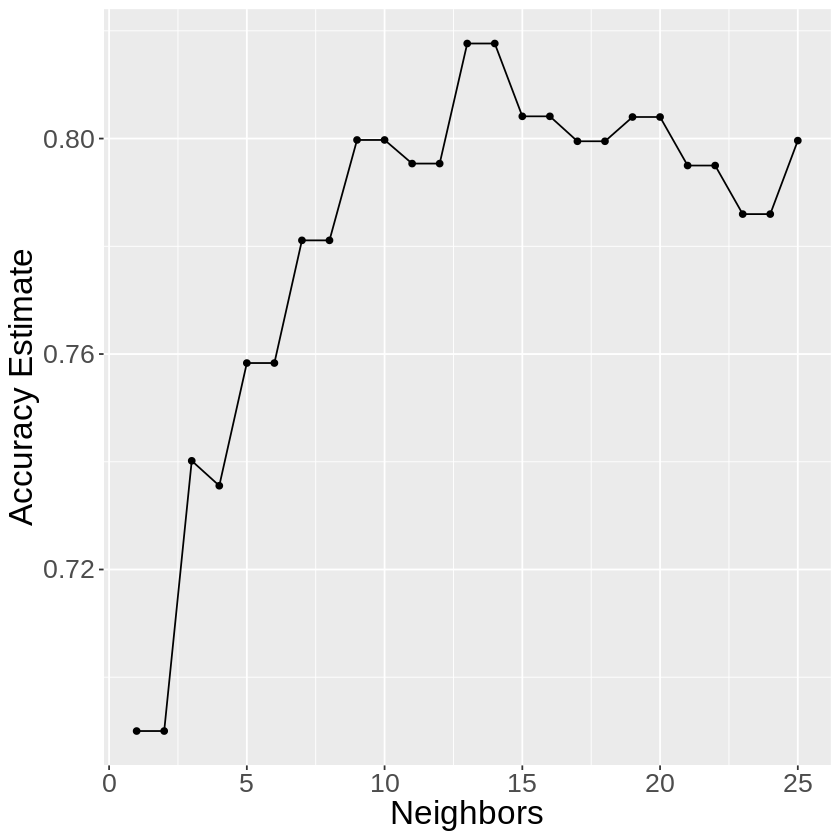

In [56]:
cross_val_plot

In [57]:
knn_best_spec <- nearest_neighbor(weight_func = "rectangular", neighbors = 18) |>
  set_engine("kknn") |>
  set_mode("classification")

heart_fit <- workflow() |>
  add_recipe(heart_recipe) |>
  add_model(knn_best_spec) |>
  fit(data = heart_training)

##(8)##
# Get the prediction column
heart_predictions <- predict(heart_fit, heart_testing) |> 
    bind_cols(heart_testing)

# Compare the accuracy of predictions to the true values in the test set
heart_acc <- heart_predictions |> 
    metrics(truth = diag, estimate = .pred_class) |> 
    select(.metric, .estimate) |> 
    head(1)

# Compare the predictions to the true values in a confusion matrix
heart_cm <- heart_predictions |> 
    conf_mat(truth = diag, estimate = .pred_class)

In [58]:
heart_acc

.metric,.estimate
<chr>,<dbl>
accuracy,0.7027027


In [59]:
heart_cm

          Truth
Prediction FALSE TRUE
     FALSE    36   11
     TRUE     11   16

In [52]:
set.seed(2022)

heart_vfold <- vfold_cv(heart_training, v = 10, strata = diag)

heart_recipe <- recipe(diag ~ oldpeak + chol, data = heart_training) |>
  step_scale(all_predictors()) |>
  step_center(all_predictors())
gridvals <- tibble(neighbors = seq(1, 25))

# Specify the model for v-fold cross validation
# neighbors = tune() is used when we want to test the accuracies for a range of different parameter values.
knn_spec <- nearest_neighbor(weight_func = "rectangular", neighbors = tune()) |>
  set_engine("kknn") |>
  set_mode("classification")

set.seed(2022)
knn_results <- workflow() |>
  add_recipe(heart_recipe) |>
  add_model(knn_spec) |>
  tune_grid(resamples = heart_vfold, grid = gridvals) |>
  collect_metrics()
knn_results

accuracies <- knn_results |>
  filter(.metric == "accuracy")
accuracies

neighbors,.metric,.estimator,mean,n,std_err,.config
<int>,<chr>,<chr>,<dbl>,<int>,<dbl>,<chr>
1,accuracy,binary,0.7188970,10,0.02124701,Preprocessor1_Model01
1,roc_auc,binary,0.6864286,10,0.02098786,Preprocessor1_Model01
2,accuracy,binary,0.7368624,10,0.02436761,Preprocessor1_Model02
⋮,⋮,⋮,⋮,⋮,⋮,⋮
24,roc_auc,binary,0.8110374,10,0.03228683,Preprocessor1_Model24
25,accuracy,binary,0.7912479,10,0.01782224,Preprocessor1_Model25
25,roc_auc,binary,0.8103104,10,0.03181030,Preprocessor1_Model25


neighbors,.metric,.estimator,mean,n,std_err,.config
<int>,<chr>,<chr>,<dbl>,<int>,<dbl>,<chr>
1,accuracy,binary,0.7188970,10,0.02124701,Preprocessor1_Model01
2,accuracy,binary,0.7368624,10,0.02436761,Preprocessor1_Model02
3,accuracy,binary,0.7368812,10,0.02159368,Preprocessor1_Model03
⋮,⋮,⋮,⋮,⋮,⋮,⋮
23,accuracy,binary,0.8139752,10,0.01932131,Preprocessor1_Model23
24,accuracy,binary,0.8139752,10,0.01932131,Preprocessor1_Model24
25,accuracy,binary,0.7912479,10,0.01782224,Preprocessor1_Model25


In [53]:
# Plot of k values against their respective accuracies
cross_val_plot <- accuracies |> 
    ggplot(aes(x = neighbors, y = mean)) +
    geom_point() +
    geom_line() +
    labs(x = "Neighbors", y = "Accuracy Estimate") +
    theme(text = element_text(size = 20))

In [ ]:
crossva